# Produce all the plots that will be included in the presentation slides and the final report 

In [1]:
# load necessary libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import geopandas as gpd

In [2]:
# load all datasets that have been previously cleaned and saved 
tg_2020 = pd.read_csv('clean_data/tg_2020.csv')
tg_2022 = pd.read_csv('clean_data/tg_2022.csv')
gt_2020 = pd.read_csv('clean_data/gt_2020.csv')
gt_2022 = pd.read_csv('clean_data/gt_2022.csv')
yt_2020 = pd.read_csv('clean_data/yt_2020.csv')
yt_2022 = pd.read_csv('clean_data/yt_2022.csv')
news = pd.read_csv('news_data/keywords.csv')
off_2020 = pd.read_csv('clean_data/off_2020.csv')
off_2022 = pd.read_csv('clean_data/off_2022.csv')
mae_in_sample= pd.read_csv('pls_nowcasts/train_both_validate_2022/metrics.csv')
mae_out_sample = pd.read_csv('pls_nowcasts/train_2020_validate_2022/metrics.csv')
mx_states = gpd.read_file('files/states.geojson')

# YouTube

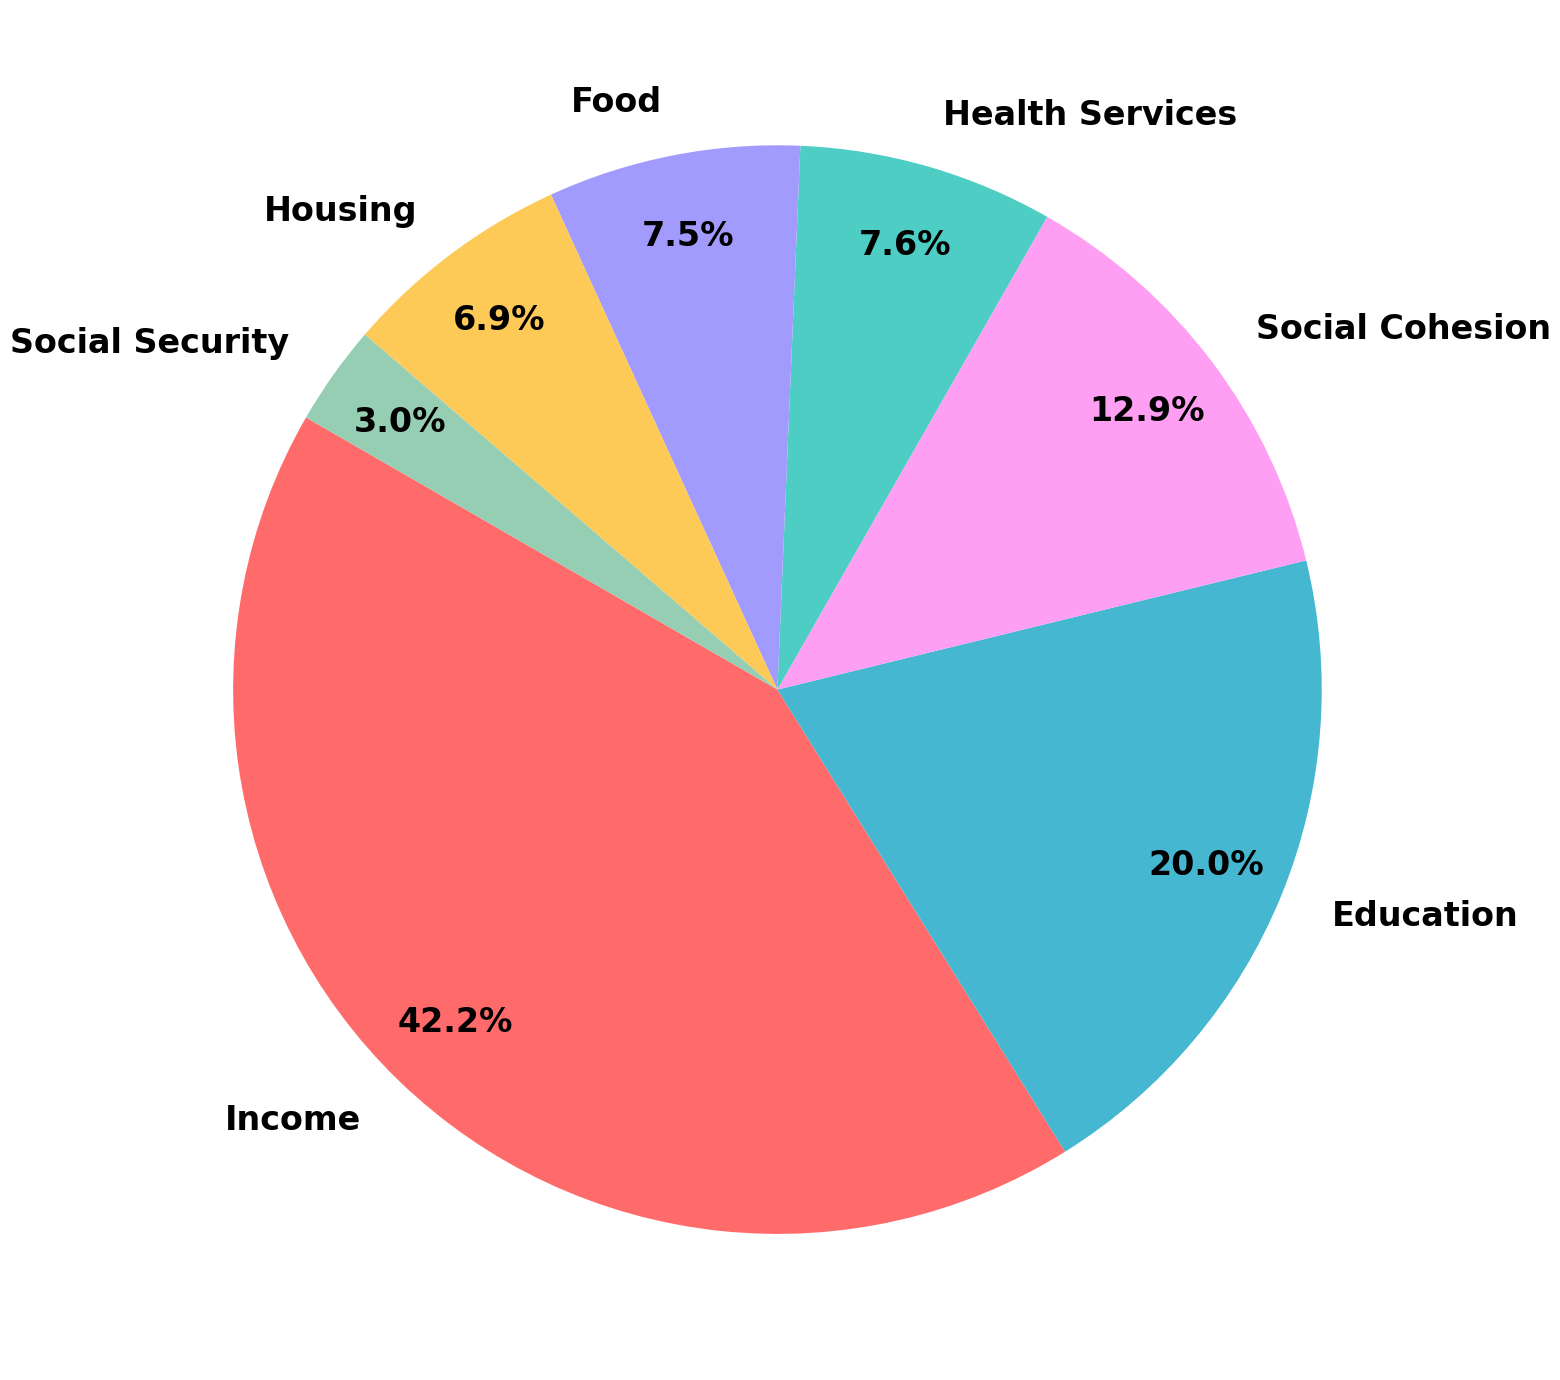

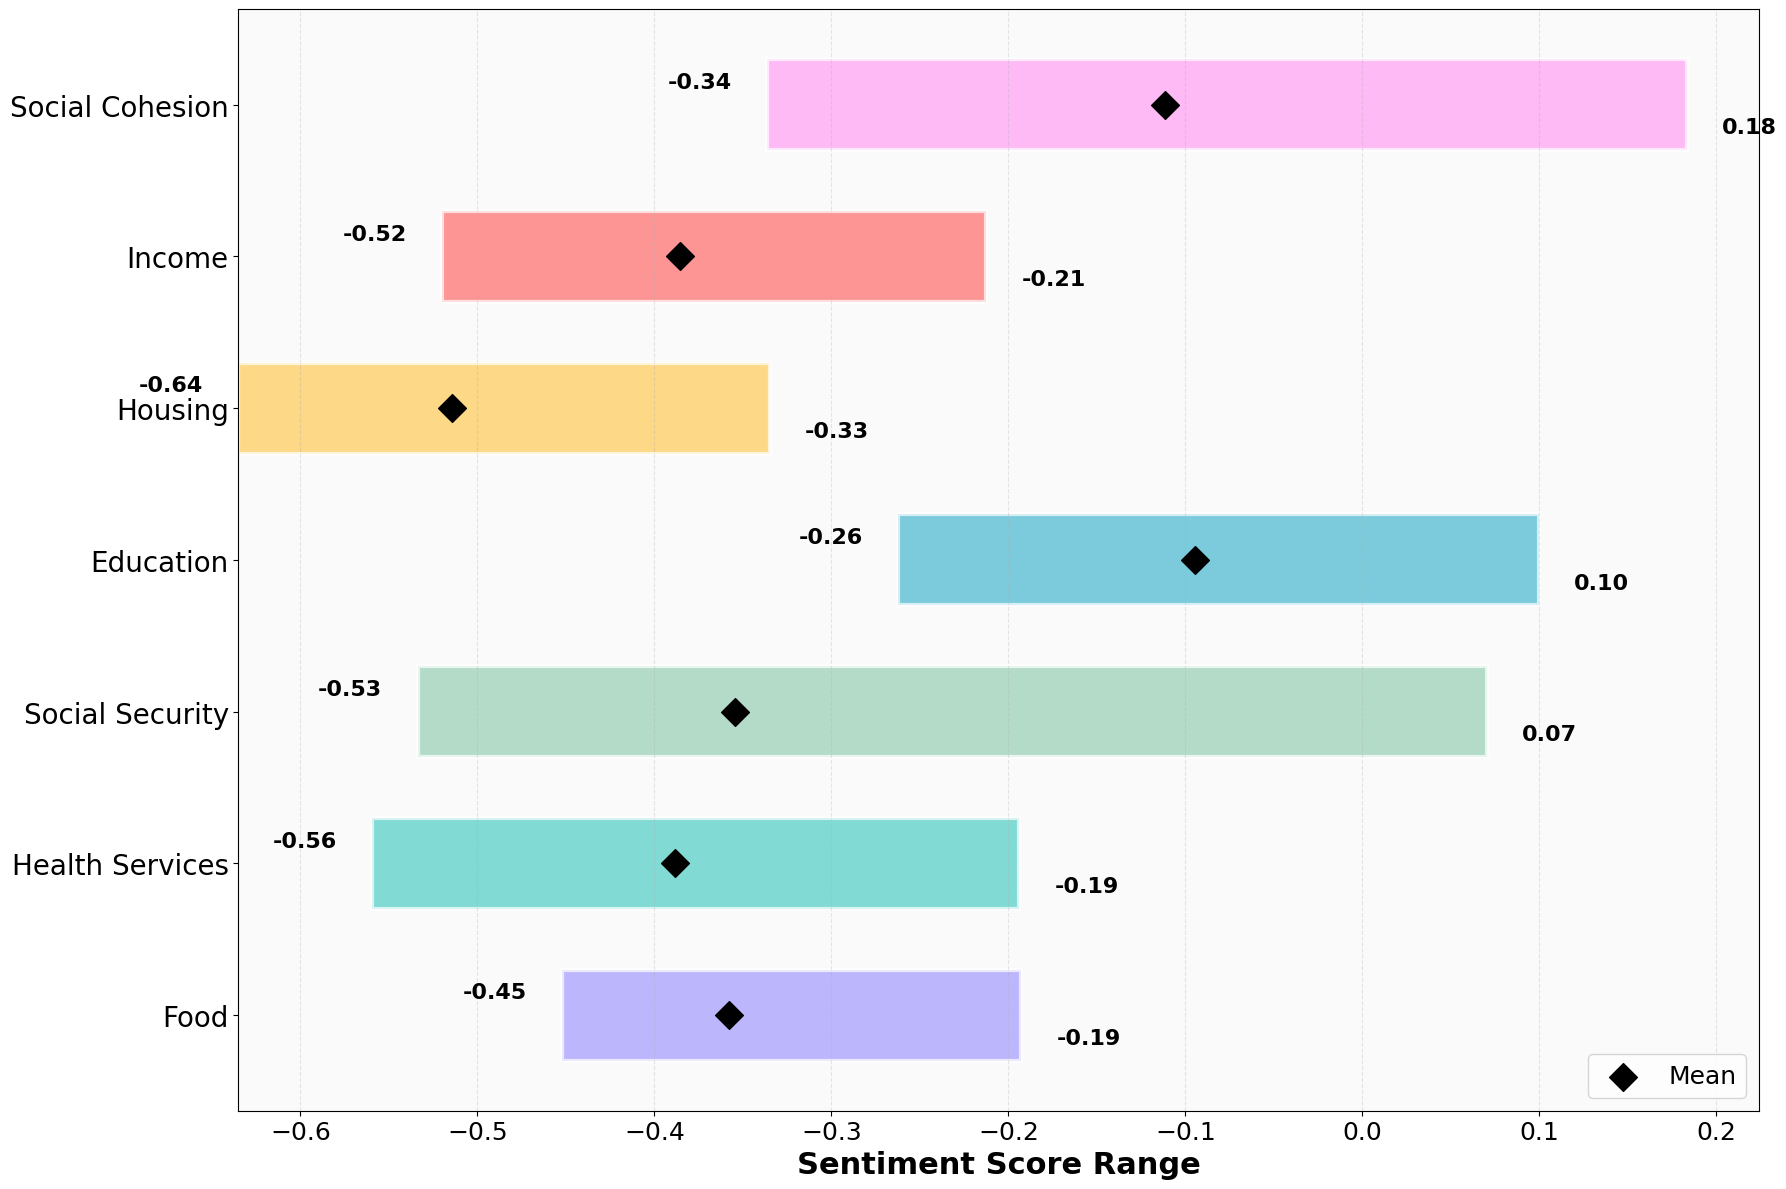

In [3]:
# define colors for each dimension - which will be used in other plots 
dimension_colors = {
    'Income': '#FF6B6B',
    'Health Services': '#4ECDC4',
    'Education': '#45B7D1',
    'Social Security': '#96CEB4',
    'Housing': '#FECA57',
    'Food': '#A29BFE',
    'Social Cohesion': '#FF9FF3', 
    'Other': "#8AD620"  }

# create a pie chart for the distribution of comments across different dimensions  
def create_comment_distribution_pie(yt_2022):
    fig, ax = plt.subplots(figsize=(16, 16))  
    
    # map columns to dimension names
    column_mapping = {
        'access_to_food_pct_yt': 'Food',
        'access_to_health_services_pct_yt': 'Health Services',
        'access_to_social_security_pct_yt': 'Social Security',
        'educational_lag_pct_yt': 'Education',
        'housing_pct_yt': 'Housing',
        'income_pct_yt': 'Income',
        'social_cohesion_pct_yt': 'Social Cohesion',
        'other_pct_yt': 'Other'}
    
    # calculate average percentages for each dimension
    avg_percentages_dict = {}
    for col, dim_name in column_mapping.items():
        if col in yt_2022.columns:
            avg_percentages_dict[dim_name] = yt_2022[col].mean() * 100
    
    # sort by average percentages in descending order
    sorted_dimensions = sorted(avg_percentages_dict.items(), key=lambda x: x[1], reverse=True)
    
    dimensions = [item[0] for item in sorted_dimensions]
    avg_percentages = [item[1] for item in sorted_dimensions]
    
    # properly map colors to dimensions
    colors = [dimension_colors[dim] for dim in dimensions]
    
    wedges, texts, autotexts = ax.pie(avg_percentages, labels=dimensions, colors=colors, 
                                     autopct='%1.1f%%', startangle=150,  
                                     textprops={'fontsize': 22, 'fontweight': 'bold'},  
                                     pctdistance=0.85)
    
    # make all fon sizes and labels  larger
    for autotext in autotexts:
        autotext.set_color('black')  
        autotext.set_fontsize(24)    
        autotext.set_fontweight('bold')
    
    for text in texts:
        text.set_fontsize(24)      
        text.set_fontweight('bold')
    
    plt.tight_layout()
    return fig

# create a horizontal bar plot showing the range of sentiment scores for each dimension
def create_sentiment_range_plot(yt_2022):
    fig, ax = plt.subplots(figsize=(18, 12))
    
    # find all columns that contain sentiment scores
    sentiment_cols = [col for col in yt_2022.columns if 'avg_sentiment' in col]
    
    # map sentiment columns to dimensions
    col_to_dimension = {
        'access_to_food_avg_sentiment': 'Food',
        'access_to_health_services_avg_sentiment': 'Health Services',
        'access_to_social_security_avg_sentiment': 'Social Security',
        'educational_lag_avg_sentiment': 'Education',
        'housing_avg_sentiment': 'Housing',
        'income_avg_sentiment': 'Income',
        'social_cohesion_avg_sentiment': 'Social Cohesion',
        'other_avg_sentiment': 'Other'}
    
    dimensions = []
    colors = []
    sentiment_ranges = []
    
    for col in sentiment_cols:
        # remove suffix _yt 
        clean_col = col.replace('_yt', '')
        
        if clean_col in col_to_dimension:
            dim_name = col_to_dimension[clean_col]
            dimensions.append(dim_name)
            colors.append(dimension_colors[dim_name])
            sentiment_ranges.append([yt_2022[col].min(), yt_2022[col].max()])
    
    for i, (dim, color, (min_val, max_val)) in enumerate(zip(dimensions, colors, sentiment_ranges)):
        ax.barh(i, max_val - min_val, left=min_val, color=color, alpha=0.7, 
                height=0.6, edgecolor='white', linewidth=3)
        
        # add marker for the mean sentiment value
        mean_val = yt_2022[sentiment_cols[i]].mean()
        ax.scatter(mean_val, i, color='black', s=200, zorder=5, marker='D')
        
        # avoid overlapping text by adjusting positions
        ax.text(min_val - 0.02, i + 0.15, f'{min_val:.2f}', ha='right', va='center', 
                fontsize=16, fontweight='bold')
        ax.text(max_val + 0.02, i - 0.15, f'{max_val:.2f}', ha='left', va='center', 
                fontsize=16, fontweight='bold')
    
    ax.set_yticks(range(len(dimensions)))
    ax.set_yticklabels(dimensions, fontsize=20)
    ax.set_xlabel('Sentiment Score Range', fontsize=22, fontweight='bold')
    ax.tick_params(axis='x', labelsize=18)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.set_facecolor('#fafafa')
    
    ax.scatter([], [], color='black', s=200, marker='D', label='Mean')
    ax.legend(loc='lower right', fontsize=18)
    
    plt.tight_layout()
    return fig

# create and save both plots 
def create_youtube_plots(yt_2022):
    fig2 = create_comment_distribution_pie(yt_2022)
    fig2.savefig('yt_comment_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    fig3 = create_sentiment_range_plot(yt_2022)
    fig3.savefig('yt_sentiment_range.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig2, fig3

fig2, fig3 = create_youtube_plots(yt_2022)

# Telegram

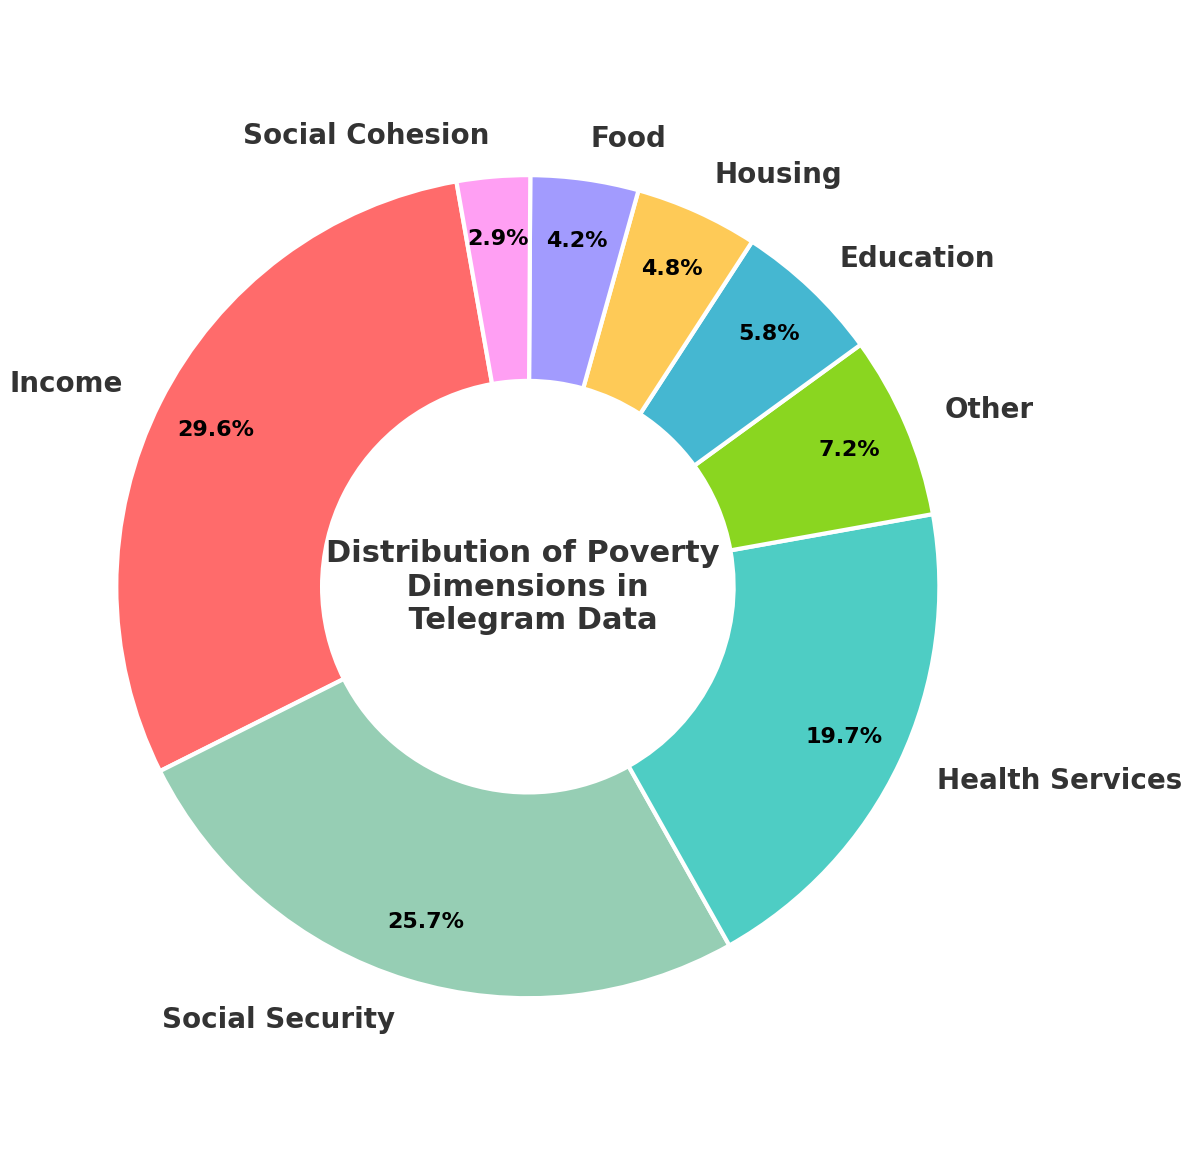

In [4]:
# map columns to dimensions name names
def rename_telegram_columns(df):
    column_mapping = {
        'access_to_food_pct_tg': 'Food',
        'access_to_health_services_pct_tg': 'Health Services', 
        'access_to_social_security_pct_tg': 'Social Security',
        'educational_lag_pct_tg': 'Education',
        'housing_pct_tg': 'Housing',
        'income_pct_tg': 'Income',
        'other_pct_tg': 'Other',
        'social_cohesion_pct_tg' : 'Social Cohesion'}
    return df.rename(columns=column_mapping)

# create a donut chart - decreasing order of shares
def create_donut(df):
    df = rename_telegram_columns(df)

    # get all dimensions
    poverty_dimensions = list(dimension_colors.keys())

    # compute average shares for each dimension - across all states 
    avg_shares = df[poverty_dimensions].mean()
    
    # order in decreasing order
    avg_shares_sorted = avg_shares.sort_values(ascending=False)

    # assign colors to each dimension
    colors = [dimension_colors[dim] for dim in avg_shares_sorted.index]

    fig, ax = plt.subplots(figsize=(12, 12))

    wedges, texts, autotexts = ax.pie(
        avg_shares_sorted.values, 
        labels=avg_shares_sorted.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=100, 
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3))

    for text in texts:
        text.set_fontsize(20)
        text.set_fontweight('bold')
        text.set_color('#333333')

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(16)
        autotext.set_fontweight('bold')

    ax.text(0, 0, 'Distribution of Poverty \n Dimensions in \n Telegram Data',
            ha='center', va='center', fontsize=22, fontweight='bold',
            color='#333333')

    ax.axis('equal')
    plt.tight_layout()
    plt.show()

    return fig, avg_shares_sorted

fig, calculated_values = create_donut(tg_2022)
fig.savefig('tg_donut.png', dpi=300, bbox_inches='tight')

# Google Trends 

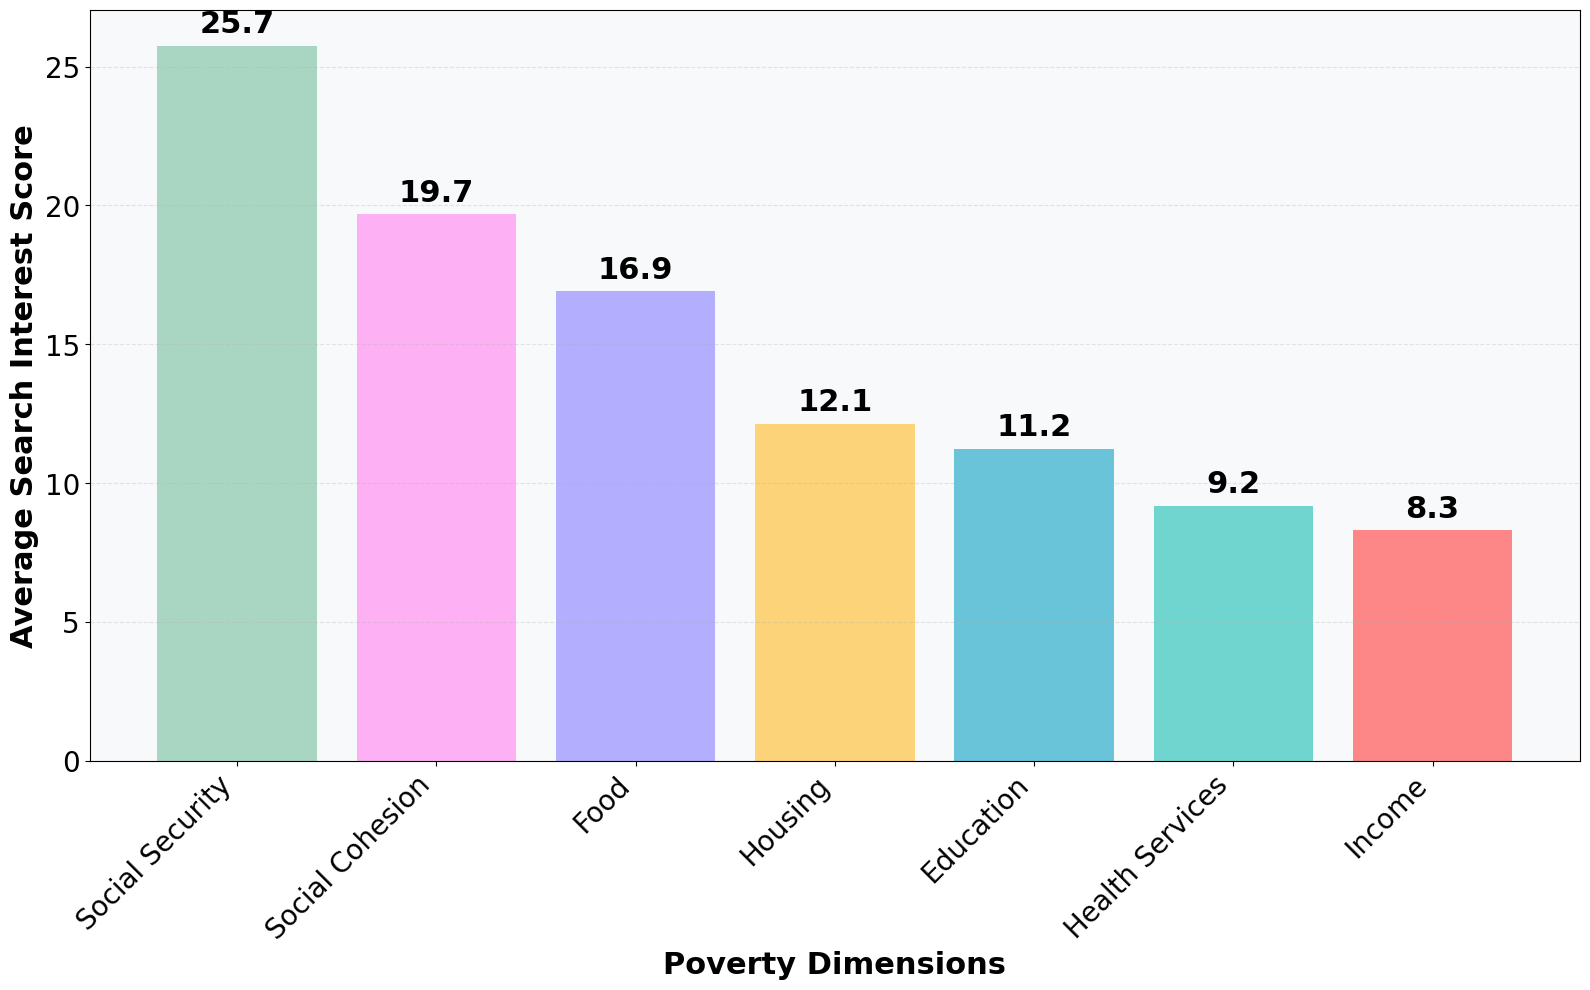

In [5]:
# re-define colors as in google trends we don't have the 'Other' dimension
dimension_colors = {
    'Income': '#FF6B6B',
    'Health Services': '#4ECDC4',
    'Education': '#45B7D1',
    'Social Security': '#96CEB4',
    'Housing': '#FECA57',
    'Food': '#A29BFE',
    'Social Cohesion': '#FF9FF3'}

# rename columns to match dimension names
def rename_gt_columns(df):
    column_mapping = {
        'income_gt': 'Income',
        'health_gt': 'Health Services',
        'educational_lag': 'Education',
        'social_gt': 'Social Security',
        'food_gt': 'Food',
        'housing_gt': 'Housing',
        'cohesion_gt': 'Social Cohesion'}
    return df.rename(columns=column_mapping)

# create a bar plot showing the average interest in each dimension
def create_gt_average_interest(df):
    
    df = rename_gt_columns(df)
    all_dimensions = list(dimension_colors.keys())
    available = [d for d in all_dimensions if d in df.columns]
    # compute the average interest for each dimension across all states 
    avg_interest = df[available].mean().sort_values(ascending=False)
    
    dimensions = avg_interest.index.values
    values = avg_interest.values
    x = np.arange(len(dimensions))
    bar_colors = [dimension_colors[dim] for dim in dimensions]
    
    fig, ax = plt.subplots(figsize=(16, 10), facecolor='white')
    bars = ax.bar(x, values,
                  color=bar_colors,
                  alpha=0.8)

    ax.set_facecolor('#f8f9fa')
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontweight='bold', fontsize=22)

    ax.set_xlabel('Poverty Dimensions', fontsize=22, fontweight='bold')
    ax.set_ylabel('Average Search Interest Score', fontsize=22, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(dimensions, rotation=45, ha='right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    return fig

fig2 = create_gt_average_interest(gt_2022)
fig2.savefig('gt_barplot.png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none', transparent=True)

# News Outlets 

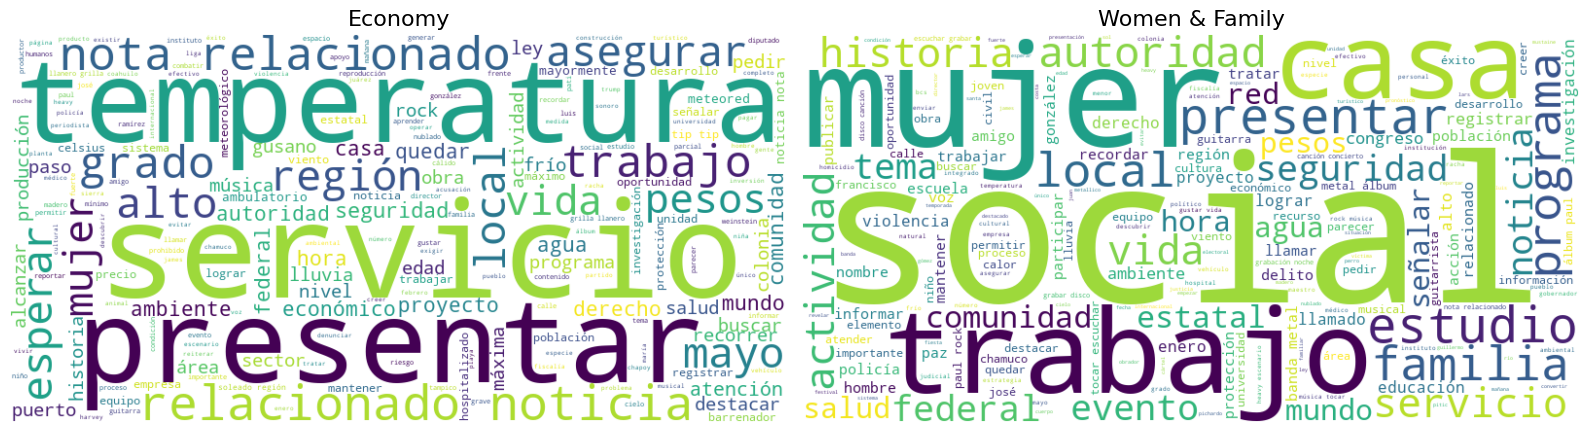

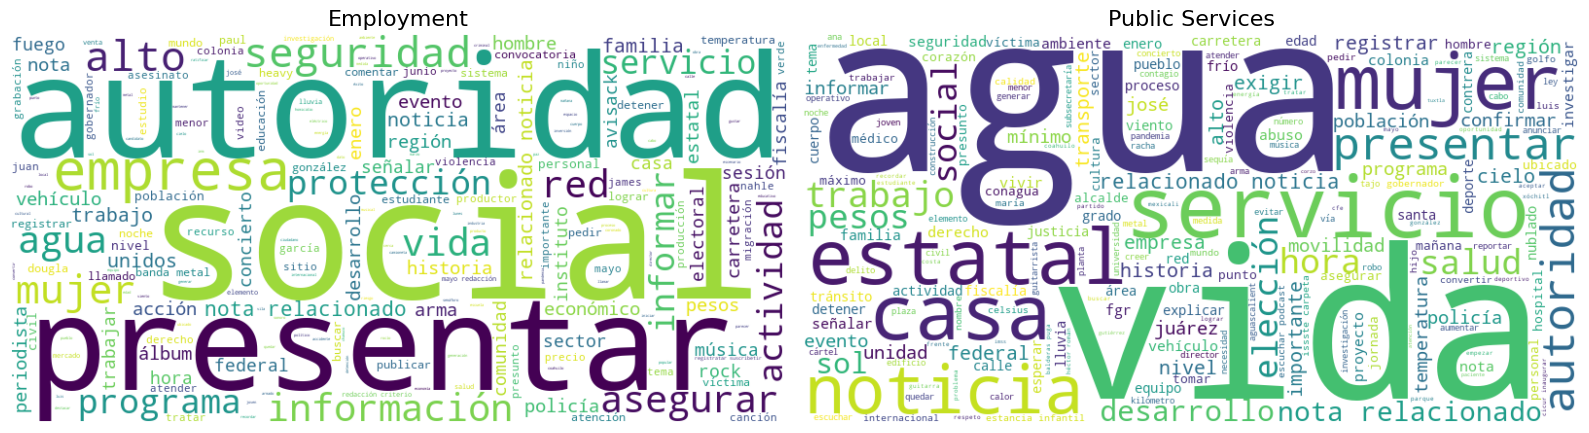

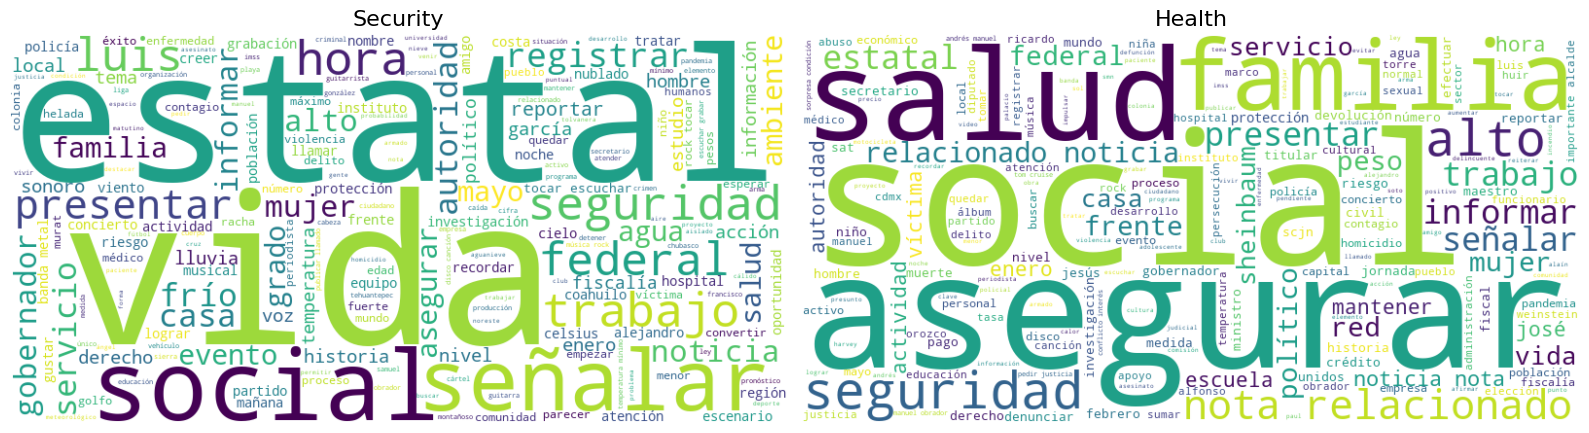

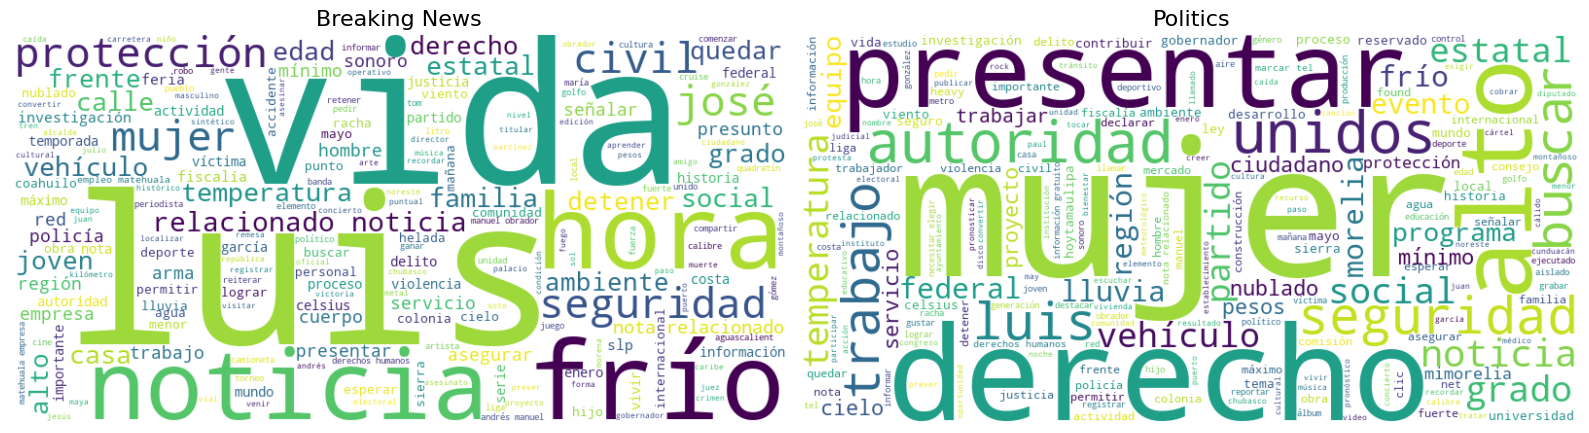

In [6]:
# map topics to their names 
topic_name_mapping = {
    "Topic_0": "Economy",
    "Topic_1": "Women & Family",
    "Topic_2": "Employment",
    "Topic_3": "Public Services",
    "Topic_4": "Security",
    "Topic_5": "Health",
    "Topic_6": "Breaking News",
    "Topic_7": "Politics"}

topic_cols = [col for col in news.columns if col.startswith("Topic_")]

for i in range(0, len(topic_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    for j in range(2):
        if i + j < len(topic_cols):
            col = topic_cols[i + j]
            text = ' '.join(news[col].dropna().tolist())
            wordcloud = WordCloud(width=800, height=400, background_color='white',
                                  colormap='viridis', random_state=123).generate(text)
            axes[j].imshow(wordcloud, interpolation='bilinear')
            axes[j].axis('off')
            title = topic_name_mapping.get(col, col) 
            axes[j].set_title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'news_wordcloud_{i//2 + 1}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Official Statistics 

In [7]:
# assign standard colormaps to each dimension
dimension_colormaps = {
    'income_target': 'Reds',        
    'health_target': 'YlGnBu',       
    'social_target': 'Greens',      
    'housing_target': 'YlOrBr',   
    'food_target': 'Purples',     
    'educ_target': 'Blues'}

# standardize state names to match the GeoDataFrame
def standardize_state_names_data(df, state_col='state'):
    state_mapping = {
        'Ciudad de México': 'Distrito Federal',
        'Estado de México': 'México',
        'Michoacán': 'Michoacán de Ocampo',
        'Veracruz': 'Veracruz de Ignacio de la Llave',
        'Coahuila': 'Coahuila de Zaragoza',
        'Coahuila de Zaragoza': 'Coahuila de Zaragoza'}
    df[state_col] = df[state_col].replace(state_mapping)
    return df

# plot a single poverty map with distribution histogram
def plot_single_poverty_map_with_distribution(df, mx_states, dim_col, title, cmap_name):
    data = pd.DataFrame({
        'region': df['state'],
        'value': df[dim_col]})

    mx_states_merged = mx_states.merge(
        data,
        left_on="state_name",
        right_on="region",
        how="left")

    # define colormap and main color for histogram
    cmap_obj = plt.get_cmap(cmap_name)
    main_color = mcolors.to_hex(cmap_obj(0.8)) 

    fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=300, gridspec_kw={'width_ratios': [3, 1]})

    # create the map
    map_plot = mx_states_merged.plot(
        column="value",
        cmap=cmap_name,
        linewidth=0.8,
        edgecolor="white",
        legend=True,
        ax=axes[0],
        missing_kwds={"color": "lightgray", "edgecolor": "white", "linewidth": 0.5},
        legend_kwds={'label': 'Poverty Rate (%)', 'shrink': 0.8})

    # define labels and ticks
    cbar = map_plot.get_figure().axes[-1]
    cbar.tick_params(labelsize=26, width=3, length=10)  
    cbar.set_ylabel("Poverty Rate (%)", fontsize=30, weight='bold', labelpad=20)  

    axes[0].set_axis_off()
    axes[0].set_title(title, fontsize=34, fontweight='bold', pad=30)  

    # histogram on the right
    values = df[dim_col].dropna()
    axes[1].hist(values, bins=8, color=main_color, edgecolor='white', linewidth=2) 
    mean_val = values.mean()
    axes[1].axvline(mean_val, color='black', linestyle='--', linewidth=5, 
                   label=f'Mean = {mean_val:.1f}%')  

    axes[1].set_title("Distribution", fontsize=30, fontweight='bold', pad=25)  
    axes[1].set_xlabel("Poverty Rate (%)", fontsize=26, fontweight='bold') 
    axes[1].tick_params(axis='x', labelsize=22, width=2, length=8) 
    axes[1].tick_params(axis='y', labelsize=22, width=2, length=8)  
    axes[1].set_yticks([])
    axes[1].legend(fontsize=22, frameon=True, fancybox=True, shadow=True, 
                  loc='upper right', framealpha=0.9, edgecolor='black')  

    axes[1].grid(True, alpha=0.4, linewidth=1.5) 

    plt.tight_layout()
    filename = f"{dim_col}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()


# do the same for all poverty dimensions separately
def plot_poverty_maps_separately(off_2022: pd.DataFrame, mx_states: gpd.GeoDataFrame):
    dimension_labels = {
        'educ_target': 'Educational Lag',
        'health_target': 'Access to Health Services',
        'social_target': 'Access to Social Security',
        'housing_target': 'Housing',
        'food_target': 'Access to Food',
        'income_target': 'Income'}

    off_data = standardize_state_names_data(off_2022.copy())

    for dim_col, title in dimension_labels.items():
        cmap = dimension_colormaps[dim_col]
        plot_single_poverty_map_with_distribution(
            df=off_data,
            mx_states=mx_states,
            dim_col=dim_col,
            title=title,
            cmap_name=cmap)

plot_poverty_maps_separately(off_2022, mx_states)

# in-sample and out-of-sample MAE

/var/folders/26/4f5n05451_j4j0z0qd39gqzr0000gn/T/ipykernel_3022/838066298.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=18)


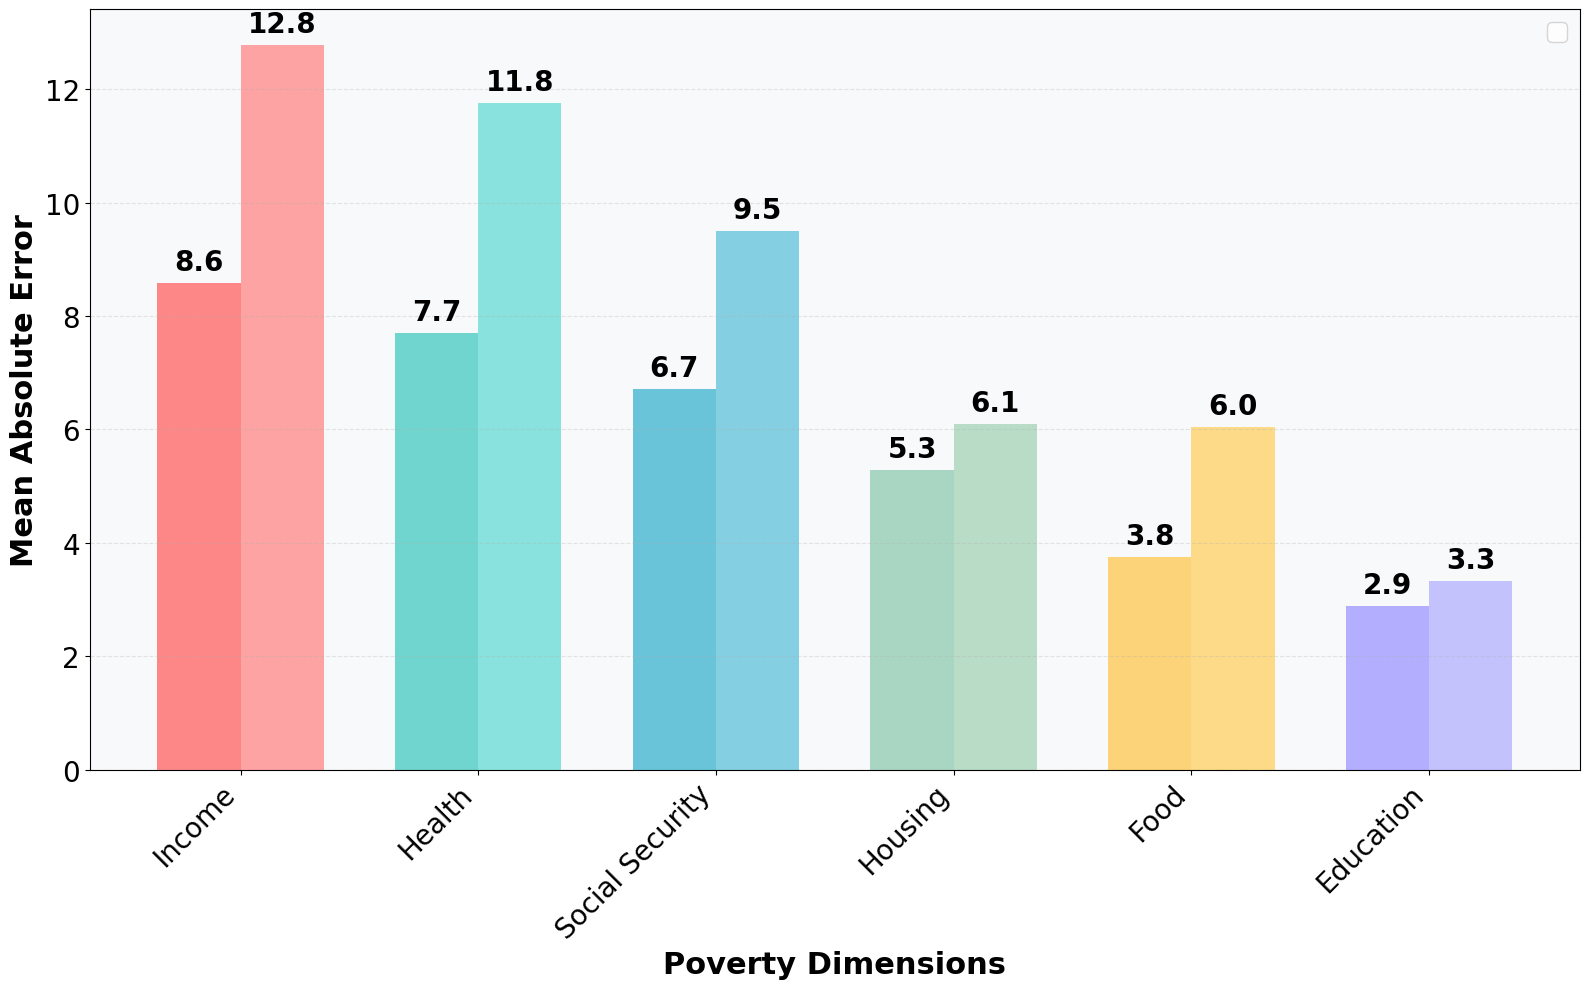

In [8]:
# create dual bar plot for in-sample and out-of-sample MAE
def create_modern_dual_bars(mae_in_sample, mae_out_sample):
    fig, ax = plt.subplots(figsize=(16, 10))  
    
    # merge in-sample and out-of-sample MAE dataframes
    merged = mae_in_sample.copy().rename(columns={'mae': 'mae_in'})
    merged['mae_out'] = mae_out_sample['mae']
    merged['mae_max'] = merged[['mae_in', 'mae_out']].max(axis=1)
    merged = merged.sort_values('mae_max', ascending=False)

    dimensions = merged['dimension'].values
    mae_in = merged['mae_in'].values
    mae_out = merged['mae_out'].values
    x = np.arange(len(dimensions))
    width = 0.35

    # define colors 
    base_colors_in = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#A29BFE']
    base_colors_out = ['#FF8E8E', '#6EDDD6', '#67C5DB', '#A8D5BA', '#FED36A', '#B8B5FF']
    colors_in = (base_colors_in * ((len(dimensions) + 5) // 6))[:len(dimensions)]
    colors_out = (base_colors_out * ((len(dimensions) + 5) // 6))[:len(dimensions)]

    # define width of the bars
    bars1 = ax.bar(x - width/2, mae_in, width, color=colors_in, alpha=0.8)
    bars2 = ax.bar(x + width/2, mae_out, width, color=colors_out, alpha=0.8)


    # set the background color of the plot
    ax.set_facecolor('#f8f9fa')

    for bar1, bar2 in zip(bars1, bars2):
        ax.annotate(f'{bar1.get_height():.1f}',
                    xy=(bar1.get_x() + bar1.get_width() / 2, bar1.get_height()),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold', fontsize=20)
        ax.annotate(f'{bar2.get_height():.1f}',
                    xy=(bar2.get_x() + bar2.get_width() / 2, bar2.get_height()),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold', fontsize=20)

    # labels
    ax.set_xlabel('Poverty Dimensions', fontsize=22, fontweight='bold')
    ax.set_ylabel('Mean Absolute Error', fontsize=22, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([d.replace('_', ' ').title() for d in dimensions], 
                       rotation=45, ha='right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.legend(fontsize=18)

    plt.tight_layout()
    return fig

fig1 = create_modern_dual_bars(mae_in_sample, mae_out_sample)
fig1.savefig('mae_bars.png', dpi=300, bbox_inches='tight', facecolor='white')

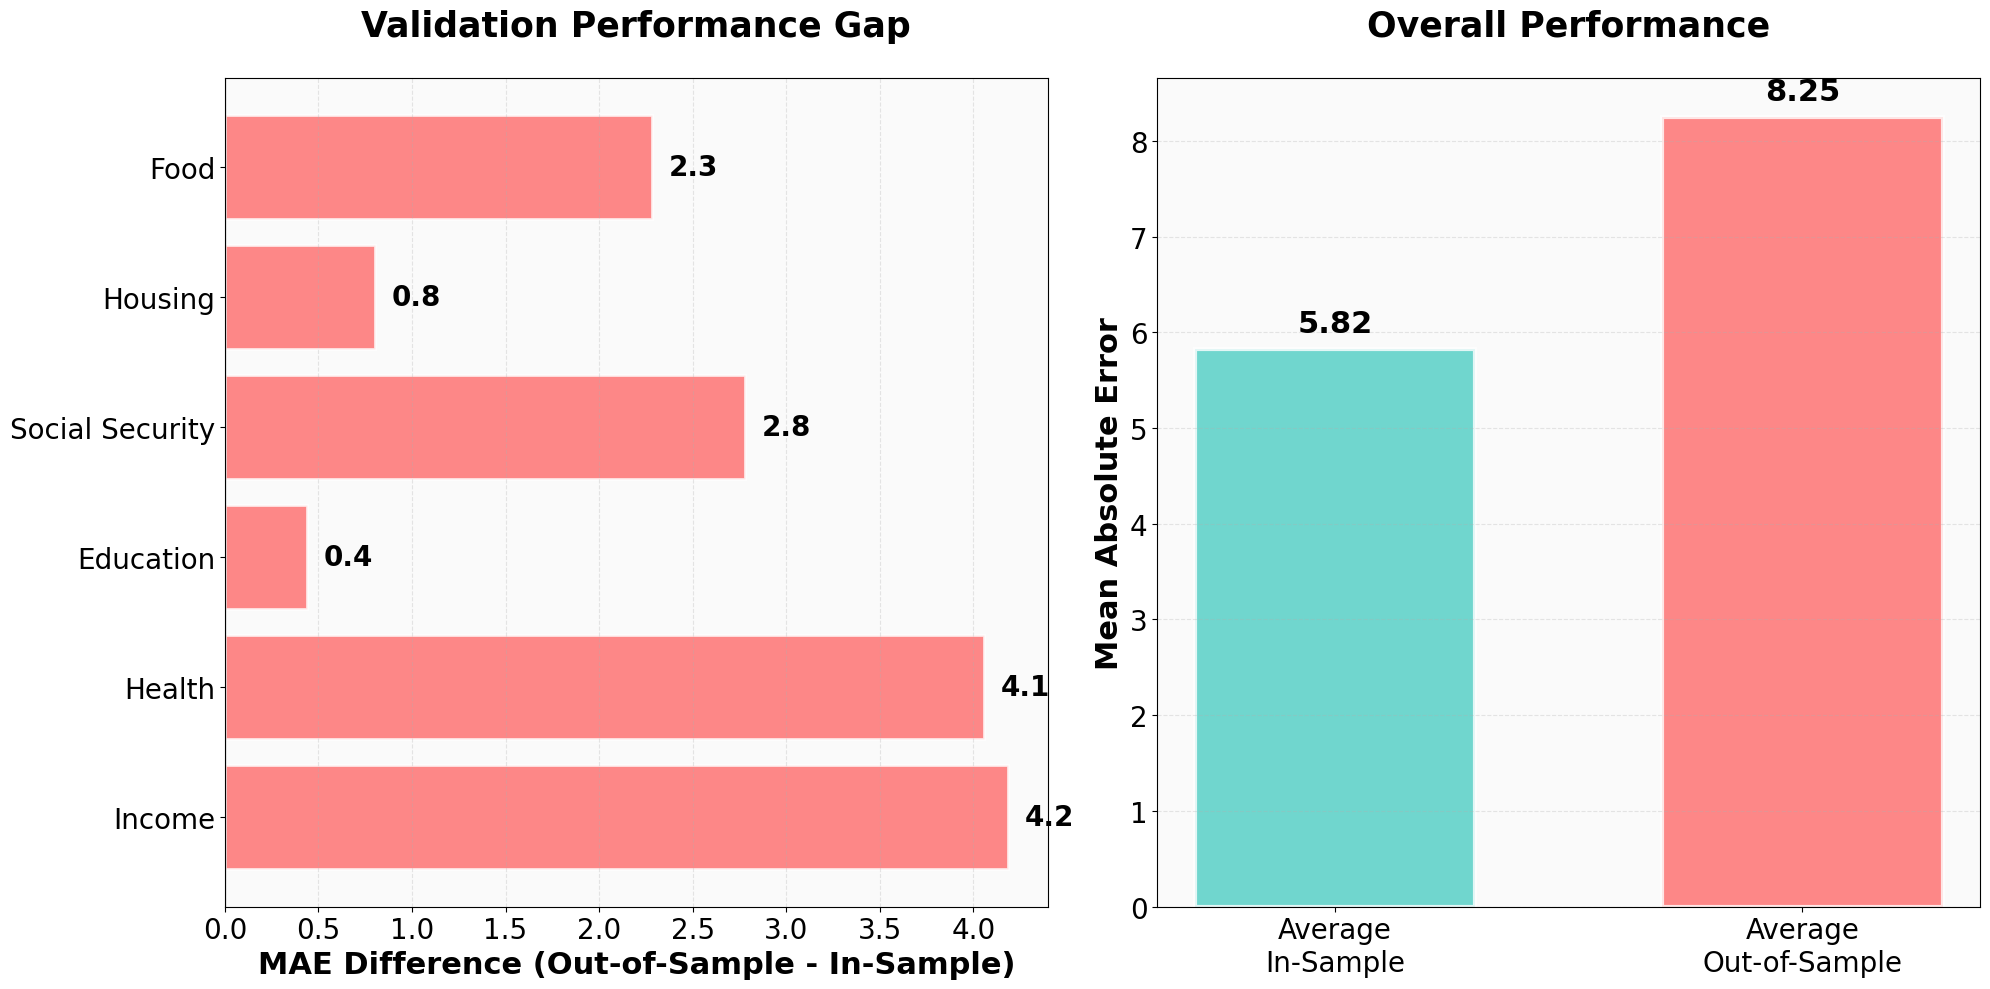

In [9]:
# create a comparison of in-sample and out-of-sample MAE
def create_mae_comparison(mae_in_sample, mae_out_sample):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  
    
    dimensions = [d.replace('_', ' ').title() for d in mae_in_sample['dimension'].values]
    mae_in = mae_in_sample['mae'].values
    mae_out = mae_out_sample['mae'].values
    
    # 1) generalization gap
    difference = mae_out - mae_in
    colors = ['#ff6b6b' if x > 0 else '#51cf66' for x in difference]
    
    bars1 = ax1.barh(range(len(dimensions)), difference, color=colors, alpha=0.8, 
                     edgecolor='white', linewidth=2)
    
    ax1.set_yticks(range(len(dimensions)))
    ax1.set_yticklabels(dimensions, fontsize=20)  # Da 12 a 16
    ax1.set_xlabel('MAE Difference (Out-of-Sample - In-Sample)', fontsize=22, fontweight='bold')  # Da 14 a 20
    ax1.set_title('Validation Performance Gap', fontsize=25, fontweight='bold', pad=30)  # Da 16 a 22
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    ax1.set_facecolor('#fafafa')
    
    ax1.tick_params(axis='x', labelsize=20)  
    
    # add values to the bars
    for i, (bar, val) in enumerate(zip(bars1, difference)):
        width = bar.get_width()
        ax1.annotate(f'{val:.1f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(12 if width >= 0 else -12, 0), textcoords="offset points",  # Maggiore spaziatura
                    ha='left' if width >= 0 else 'right', va='center', 
                    fontweight='bold', fontsize=20)  # Da 11 a 16
    
    # 2) overall Performance
    avg_mae_in = mae_in.mean()
    avg_mae_out = mae_out.mean()
    
    categories = ['Average\nIn-Sample', 'Average\nOut-of-Sample']
    values = [avg_mae_in, avg_mae_out]
    colors_summary = ['#4ecdc4', '#ff6b6b']
    
    bars2 = ax2.bar(categories, values, color=colors_summary, alpha=0.8, 
                   edgecolor='white', linewidth=3, width=0.6)
    
    # add values to the bars
    for bar, val in zip(bars2, values):
        height = bar.get_height()
        ax2.annotate(f'{val:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 8), textcoords="offset points",  
                    ha='center', va='bottom', fontweight='bold', fontsize=22)  
    
    ax2.set_ylabel('Mean Absolute Error', fontsize=22, fontweight='bold')  
    ax2.set_title('Overall Performance', fontsize=25, fontweight='bold', pad=30)  
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    ax2.set_facecolor('#fafafa')
    ax2.tick_params(axis='x', labelsize=20)  
    ax2.tick_params(axis='y', labelsize=20) 
    
    # Styling generale
    fig.patch.set_facecolor('#ffffff')
    
    plt.tight_layout()
    return fig

fig1 = create_mae_comparison(mae_in_sample, mae_out_sample)
fig1.savefig('mae_analysis.png', dpi=300, bbox_inches='tight')